In [1]:
from os import walk
import re
from tqdm import tqdm

# Dataset - https://www.kaggle.com/datasets/d0rj3228/russian-literature
base_path = 'd:/Downloads/Russian texts database/prose/'
data_text = ''

for dirpath, dirnames, filenames in walk(base_path):
    for file_name in filenames:
        if file_name[-4:] != '.txt': continue

        print('Read:', file_name)
        current_text = open(dirpath + '/' + file_name, 'r', encoding='utf-8').read()
        data_text += current_text

def prepare_text(text):
    n_text = text.lower()
    n_text = re.sub(r'\n+', '', n_text)
    n_text = re.sub(r'\s+', ' ', n_text)

    return n_text

data_text = prepare_text(data_text)

alphabet = list(set(data_text))

print('---')
print('Final data size:', len(data_text), 'symbols')
print('Alphabet length:', len(alphabet))
print('Alphabet:', alphabet)

Read: ╨б╨║╨░╨╖╨║╨░ ╨╛ ╤В╨╛╨╣, ╨║╨╛╤В╨╛╤А╨░╤П ╨╜╨╡ ╨┐╨╛╨╣╨╝╨╡╤В ╨╡╤С.txt
Read: ╨б╨╛╨│╤А╨░╨╢╨┤╨░╨╜╨╡.txt
Read: ╨Ф╨╡╨▓╤Г╤И╨║╨░ ╤А╨╛╨╖╨╛╨▓╨╛╨╣ ╨║╨░╨╗╨╕╤В╨║╨╕ ╨╕ ╨╝╤Г╤А╨░╨▓╤М╨╕╨╜╤Л╨╣ ╤Ж╨░╤А╤М.txt
Read: ╨Э╨╕ ╤Б╨╜╤Л, ╨╜╨╕ ╤П╨▓╤М.txt
Read: ╨а╨╡╤Б╨┐╤Г╨▒╨╗╨╕╨║╨░ ╨о╨╢╨╜╨╛╨│╨╛ ╨Ъ╤А╨╡╤Б╤В╨░.txt
Read: ╨а╨╡╤П ╨б╨╕╨╗╤М╨▓╨╕╤П.txt
Read: ╨а╨░╤Б╤Б╨║╨░╨╖╤Л ╨Ь╨░╤И╨╕, ╤Б ╤А╨╡╨║╨╕ ╨Ь╨╛╨╗╨╛╨│╨╕, ╨┐╨╛╨┤ ╨│╨╛╤А╨╛╨┤╨╛╨╝ ╨г╤Б╤В╤О╨╢╨╜╨░.txt
Read: ╨б╨╡╤Б╤В╤А╤Л.txt
Read: ╨б╨╡╨╝╤М ╨╖╨╡╨╝╨╜╤Л╤Е ╤Б╨╛╨▒╨╗╨░╨╖╨╜╨╛╨▓.txt
Read: ╨в╨╡╨┐╨╡╤А╤М, - ╨║╨╛╨│╨┤╨░ ╤П ╨┐╤А╨╛╤Б╨╜╤Г╨╗╤Б╤П....txt
Read: ╨з╨╡╤А╨╡╨╖ ╨┐╤П╤В╨╜╨░╨┤╤Ж╨░╤В╤М ╨╗╨╡╤В.txt
Read: ╨н╨╗╤Г╨╗╨╕, ╤Б╤Л╨╜ ╨н╨╗╤Г╨╗╨╕.txt
Read: ╨о╨┐╨╕╤В╨╡╤А ╨┐╨╛╨▓╨╡╤А╨╢╨╡╨╜╨╜╤Л╨╣.txt
Read: ╨Р╨╗╤В╨░╤А╤М ╨┐╨╛╨▒╨╡╨┤╤Л.txt
Read: ╨С╨╡╨╝╨╛╨╗╤М.txt
Read: ╨Т ╨┐╨╛╨┤╨╖╨╡╨╝╨╜╨╛╨╣ ╤В╤О╤А╤М╨╝╨╡.txt
Read: ╨Т ╨╖╨╡╤А╨║╨░╨╗╨╡.txt
Read: ╨Т ╨▒╨░╤И╨╜╨╡.txt
Read: ╨Т╨╛╤Б╤Б╤В╨░╨╜╨╕╨╡ ╨╝╨░╤И╨╕╨╜.txt
Read: ╨У╨╛╤А╨░ ╨Ч╨▓╨╡╨╖╨┤╤Л.txt
Read: ╨Ф╨╕╤В╤П ╨╕ ╨▒╨╡╨╖╤Г╨╝╨╡╤Ж.txt
Read: ╨Ф╨╡╨║╨░╨┤╨╡╨╜╤В.txt
Read: ╨Ч╨░ ╤Б╨╡╨▒╤П ╨╕

In [2]:
import numpy as np

class LetterCounter:
    def __init__(self, alphabet):
        self.alphabet = alphabet
        self.letter_index = {alphabet[i]: i for i in range(len(alphabet))}
        self.counter = np.zeros((len(alphabet), len(alphabet)), dtype=np.int32)

    def correlate(self, prev, next):
        prev_ind = self.letter_index[prev]
        next_ind = self.letter_index[next]

        self.counter[prev_ind][next_ind] += 1
    
    def predict_raw(self, prev):
        prev_ind = self.letter_index[prev]
        return self.counter[prev_ind]
    
    def predict(self, prev):
        preds = self.predict_raw(prev)
        return {alphabet[i]: preds[i] for i in range(len(alphabet))}
    
    def predict_unif(self, prev):
        preds = self.predict_raw(prev)
        total = sum(preds)
        return {alphabet[i]: preds[i] / total for i in range(len(alphabet))}
    
    def predict_next(self, prev):
        return alphabet[self.predict_raw(prev).argmax()]

    def get_rate(self, prev, next):
        return self.counter[self.letter_index[prev]][self.letter_index[next]]


class Model(LetterCounter):
    def __init__(self, alphabet, frag_len):
        super().__init__(alphabet)
        self.frag_len = frag_len
        self.counters = [LetterCounter(alphabet) for _ in range(frag_len)]

    def correlate(self, prev_frag, next):
        next_ind = self.letter_index[next]

        for i in range(self.frag_len):
            prev_ind = self.letter_index[prev_frag[i]]
            self.counters[i].counter[prev_ind][next_ind] += 1
            self.counter[prev_ind][next_ind] += 1

    def predict_raw(self, prev_frag):
        defect = 0
        #defect = self.frag_len - len(prev_frag)
        #prev_frag = ' '*defect + prev_frag

        preds = np.zeros(len(alphabet))
        
        for i in range(defect, self.frag_len):
            preds += self.counters[i].predict_raw(prev_frag[i])

        return preds


fragment_len = 5
model = Model(alphabet, fragment_len)

letts_n = len(data_text)
#letts_n = 100_000
for i in tqdm(range(fragment_len, letts_n)):
    model.correlate(data_text[i-fragment_len : i], data_text[i])


100%|██████████| 36161152/36161152 [04:30<00:00, 133802.76it/s]


In [3]:
import pandas as pd
import json

# Saving data

#json.dump(model.counter, open('correlation data.json', 'w'))

df = pd.DataFrame(model.counter, index=alphabet, columns=alphabet)
df.to_csv('correlation data.csv', sep='\t')

# so df.loc['а', 'в'] == df['в', 'а'] == data_text.count('ав') == model.counter['в']['а'] == 99253

In [4]:
#import pandas as pd
#import json
#
#f = open('correlation data.json')
#json_data = json.load(f)
#f.close()
#
#df = pd.read_csv('correlation data.csv', sep='\t', index_col=0)

In [5]:
need_alph = list(' абвгдеёжзийклмнопрстуфхцчшщъыьэюя.,!?-')

#data = df.loc[need_alph, need_alph]
data = df.loc[:, :]

data.loc[need_alph, need_alph].head()

,,а,б,в,г,д,е,ё,ж,з,...,ы,ь,э,ю,я,.,",",!,?,-
,2735993,1907866,605031,1252861,547769,920261,2127528,14805,318354,526351,...,390128,213368,122474,108655,399376,94909,240405,19174,16630,121616
а,2042257,633826,133468,417865,133814,251312,643499,2265,102389,199631,...,139868,234796,21475,71403,251170,153409,331961,27963,21671,47242
б,324420,162813,17963,68974,34112,69252,192541,333,21862,35129,...,144761,56942,4149,15646,50489,23008,51789,4940,3148,3672
в,919893,453801,47734,157374,87452,158167,578043,9529,38707,76780,...,138769,111395,18524,42973,126704,62352,143572,10180,7026,14269
г,401318,195238,33424,105268,18220,111873,124479,273,12044,34025,...,28435,13782,2828,10548,47516,31035,58812,4422,3276,9997


In [6]:
print("Probability of the next one after the previous one")
next_to_prev = data.div(data.sum(axis=1), axis=0)
next_to_prev = next_to_prev.apply(lambda x: round(x*100, 2))
next_to_prev.loc[need_alph, need_alph].head()

Probability of the next one after the previous one


,,а,б,в,г,д,е,ё,ж,з,...,ы,ь,э,ю,я,.,",",!,?,-
,9.45,6.59,2.09,4.33,1.89,3.18,7.35,0.05,1.10,1.82,...,1.35,0.74,0.42,0.38,1.38,0.33,0.83,0.07,0.06,0.42
а,17.78,5.52,1.16,3.64,1.17,2.19,5.60,0.02,0.89,1.74,...,1.22,2.04,0.19,0.62,2.19,1.34,2.89,0.24,0.19,0.41
б,12.91,6.48,0.71,2.74,1.36,2.76,7.66,0.01,0.87,1.40,...,5.76,2.27,0.17,0.62,2.01,0.92,2.06,0.20,0.13,0.15
в,14.06,6.94,0.73,2.41,1.34,2.42,8.84,0.15,0.59,1.17,...,2.12,1.70,0.28,0.66,1.94,0.95,2.20,0.16,0.11,0.22
г,15.08,7.34,1.26,3.96,0.68,4.20,4.68,0.01,0.45,1.28,...,1.07,0.52,0.11,0.40,1.79,1.17,2.21,0.17,0.12,0.38


C:\Users\CA81~1\AppData\Local\Temp/ipykernel_756/1628655845.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


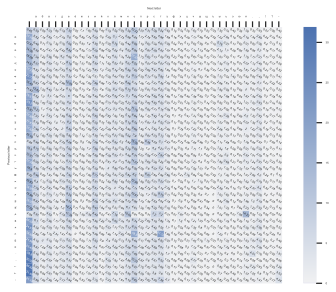

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

sns.set_context('notebook')
sns.set_style("ticks")

sns.set(font_scale=0.25)

ax = sns.heatmap(next_to_prev.loc[need_alph, need_alph],
                 annot=True, fmt='g', annot_kws={'rotation': -30},
                 square=True, xticklabels=True, yticklabels=True,
                 cmap=sns.color_palette("light:b", as_cmap=True))

ax.xaxis.tick_top()
ax.set(ylabel="Previous letter")
ax.set_title("Next letter")
plt.tight_layout()
plt.show()

In [8]:
letters_predicted = 0
predictability = 0
n = 100_000
#n = len(data_text)

for i in tqdm(range(fragment_len, n)):
    text_fragment = data_text[i-fragment_len : i]

    predictability += model.predict_unif(text_fragment)[data_text[i]]
    letters_predicted += 1 if model.predict_next(text_fragment) == data_text[i] else 0

predictability /= n - 1
letters_predicted /= n - 1
print('Predicted ', round(letters_predicted*100, 2), '% of letters')
print('Predictability of russian language is', round(predictability*100, 2), '%')
    

100%|██████████| 99995/99995 [00:12<00:00, 7828.15it/s]

Predicted  16.61 % of letters
Predictability of russian language is 7.34 %


In [16]:
#text = 'приветики, съешь ещё этих мягких французских булочек да выпей чаю'
#text = 'и снова седая ночь, и только ей доверяю я, знаешь седая ночь что-то та-а-ам'
#text = 'мне нужно это предложение, чтобы протестировать некий анализ йей!'
text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы – следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт – то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")

r = text[:fragment_len]
for i in range(fragment_len, len(text)):
    #if model.predict_unif(text[i-fragment_len : i])[text[i]] > 0.09 and text[i] != ' ':
    #if model.predict_unif(r[-fragment_len:])[text[i]] > 0.06 and text[i] != ' ':
    #if model.predict_next(data_text[i-fragment_len : i]) == data_text[i] and text[i] != ' ':
    if model.predict_next(r[-fragment_len:]) == data_text[i] and text[i] != ' ':
        r += ''
    else:
        r += text[i]

print(r)
print('Original length:', len(text))
print('Compressed length:', len(r))
print('Compression:', len(text) / len(r) - 1)

если псотреь из чео олучаеся ориинальная мыль о моем выеить сеующи фатоы: личне ценности, кльтурны опыт, перспектва  взгляд на мир эмоционлные  интитивные омпнеты. и этоо и складыаетя инивидуальнось тврца-челвека. ии е обадает эмоцияи но то из этого не мое быть имиировно? он не може обладать нчем из перчиленнго, веь это с писще живым  мыслщим сущетва, а ии не жиой; однак он может се т вптат и воссоздаь в себ. эти фактры – слдсвие всг пержтог, всго наколенного и тпечатанноо оыта. а витывать опыт – то что ии и делат и спообн делаь это луш нас и  гразд больше объеме, ем способны юди, ведь ии е оганиче физиооическими факторам.
Original length: 734
Compressed length: 630
Compression: 0.16507936507936516


### Trying machine learning

In [58]:
input_len = fragment_len

data_size = len(data_text) - input_len
print('Train data size:', data_size)

X = np.zeros((data_size, input_len), dtype=np.float64)
Y = np.zeros((data_size, len(alphabet)), dtype=np.int8)

letter_index = {alphabet[i]: i for i in range(len(alphabet))}

for i in tqdm(range(input_len, len(data_text))):
    string = data_text[i-input_len : i]
    X[i-input_len] = np.array([letter_index[s] for s in string])
    
    letter_ind = letter_index[data_text[i]]
    Y[i-input_len][letter_ind] = 1
    
print('X shape:', X.shape)
print('Y shape:', Y.shape)

print(X)
print(Y)

Train data size: 36161152


100%|██████████| 36161152/36161152 [02:15<00:00, 267125.26it/s]

X shape: (36161152, 5)
Y shape: (36161152, 160)


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

batch_size = 32
dropout_val = 0.3
embending_size = 64

model = Sequential([
    Embedding(len(alphabet), embending_size, input_length=input_len),
    #Dropout(dropout_val),

    Flatten(),

    #Dense(128, stateful=True),
    #Dropout(dropout_val),

    Dense(len(alphabet), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['loss', 'accuracy'])
model.summary()

history = model.fit(X, Y, epochs=3, validation_split=0.2, batch_size=batch_size)

model.save('LP')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 5, 64)             10240     
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_10 (Dense)            (None, 160)               51360     
                                                                 
Total params: 61,600
Trainable params: 61,600
Non-trainable params: 0
_________________________________________________________________


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title("loss, val_loss")

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title("accuracy, val_accuracy")
axs[1].set_ylim([0, 1])

plt.show()